# Imports

In [1]:
import os

from matplotlib import pyplot as plt

from src.utils import (
    get_data,
    get_device,
    load,
    plot_image_and_prediction,
    plot_image_channels,
    plot_labels_in_germany,
    plot_true_vs_predicted_scatter,
    plot_true_vs_predicted_histogram,
    plot_predictions,
    predict_batch,
    predict_image,
    seed_everyting,
    test,
    loss,
)

# Global parameters

In [2]:
image_size = 256
img_dir = "data/images"
model_dir = "models"
patch_dir = "data/patches"
results_dir = "results"
gedi_dir = "data/gedi"
random_state = 42
batch_size = 12
num_workers = os.cpu_count() // 2
bins = list(range(0, 55, 5))
device = get_device()

seed_everyting(random_state)

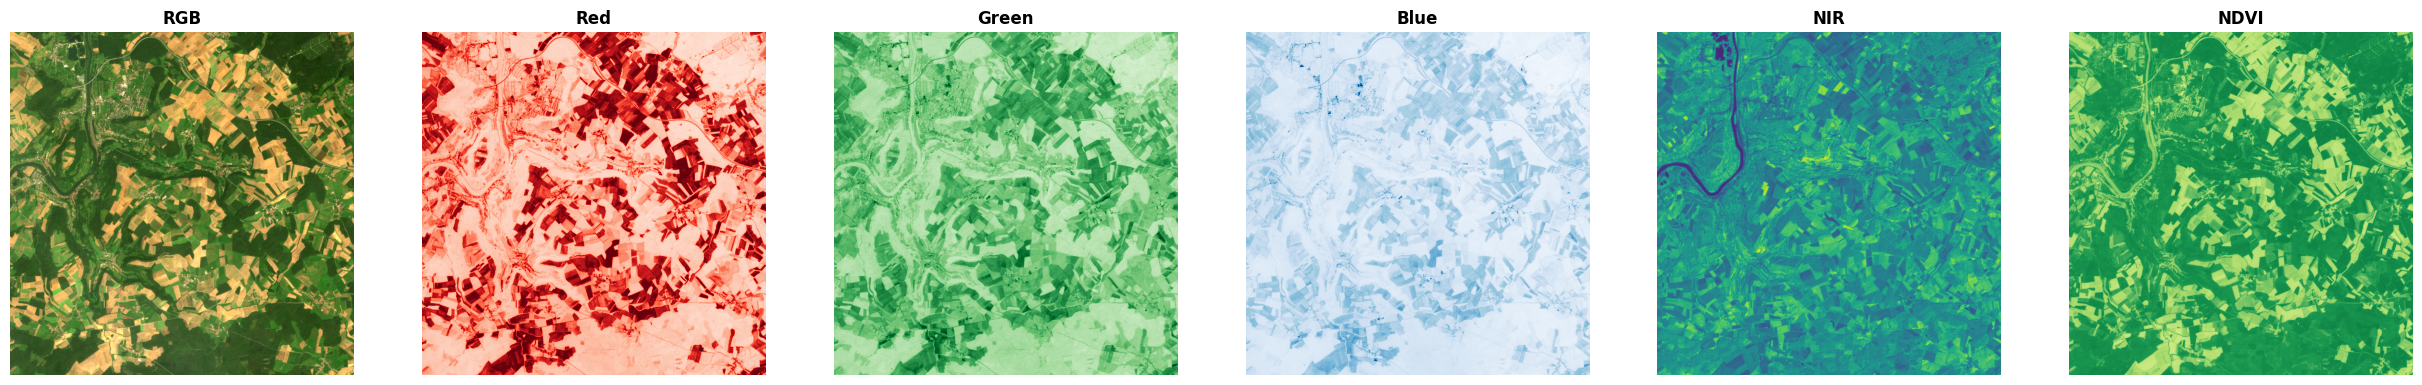

In [3]:
plot_image_channels(f"{img_dir}/L15-1060E-1348N.tif")

In [4]:
# plot_labels_in_germany()

In [5]:
# Plot histogram of labels
# TODO

# Create dataloaders

In [6]:
# Create dataloaders
_, _, test_dl = get_data(
    img_dir, patch_dir, gedi_dir, image_size, batch_size, num_workers, bins
)

INFO:root:Starting preprocessing...
INFO:root:Directories validated.
INFO:root:Images loaded.
INFO:root:Number of images: 48
INFO:root:GEDI data loaded.
INFO:root:Loaded existing patch info file. Skipping image processing.
INFO:root:Number of patches: 9234
INFO:root:Number of labels: 629074


# Load models

In [7]:
models = {
    filename[: -len(".pt")]: load(os.path.join(model_dir, filename), device)
    for filename in [f for f in os.listdir(model_dir) if f.endswith(".pt")]
}

# Visualise results

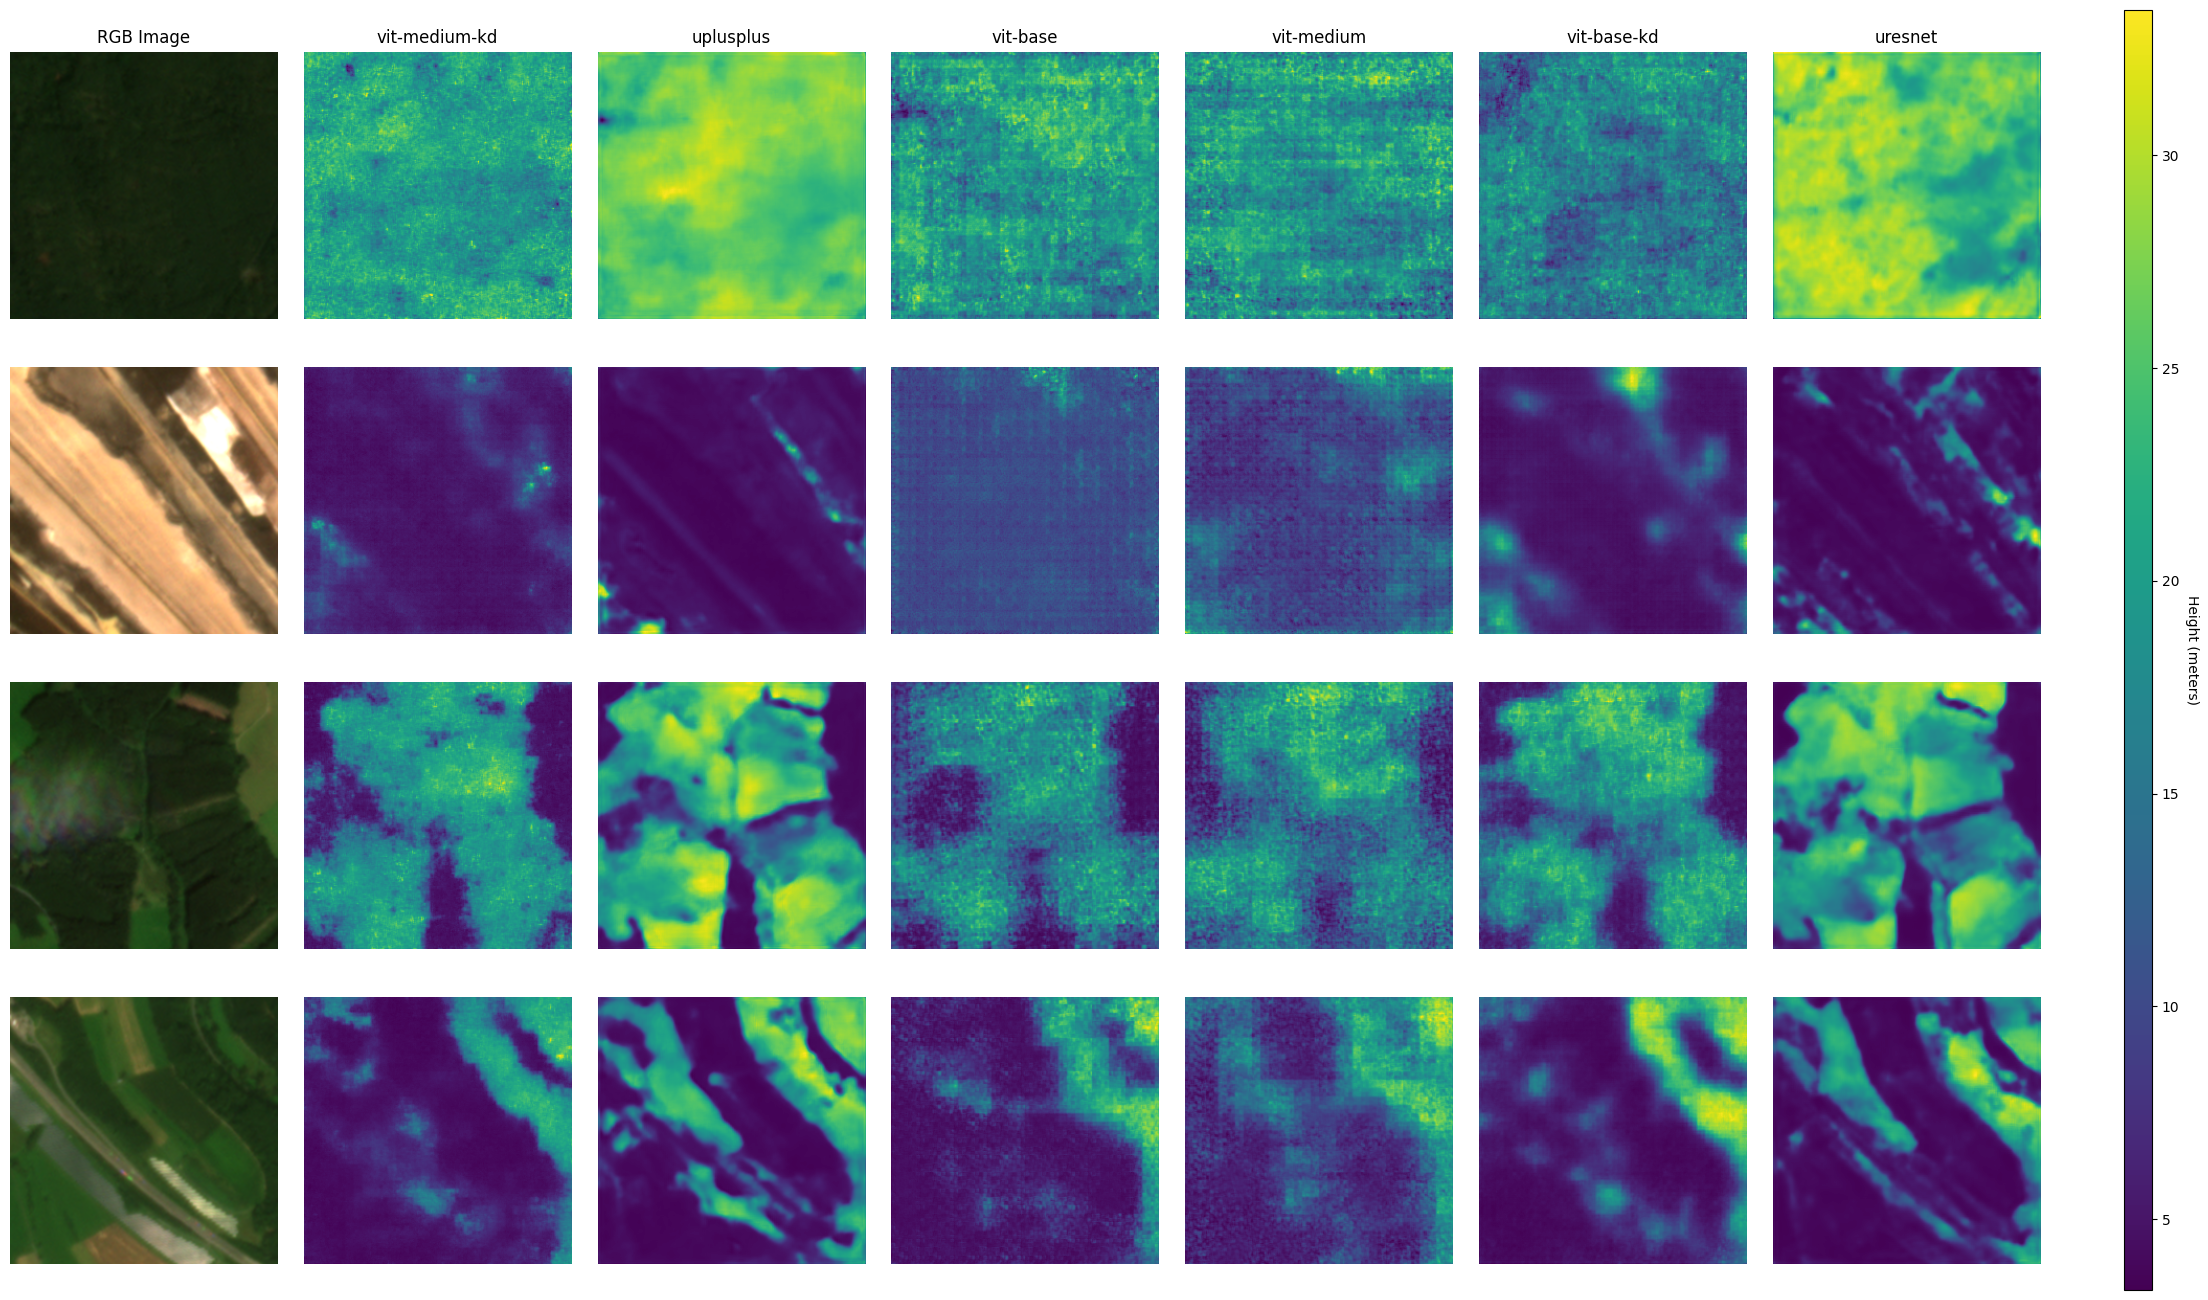

In [8]:
plot_predictions(*predict_batch(models, test_dl, device))

# Select model

In [9]:
model_name = "vit-medium-kd"
model = models[model_name]

100%|██████████| 256/256 [00:15<00:00, 16.24it/s]


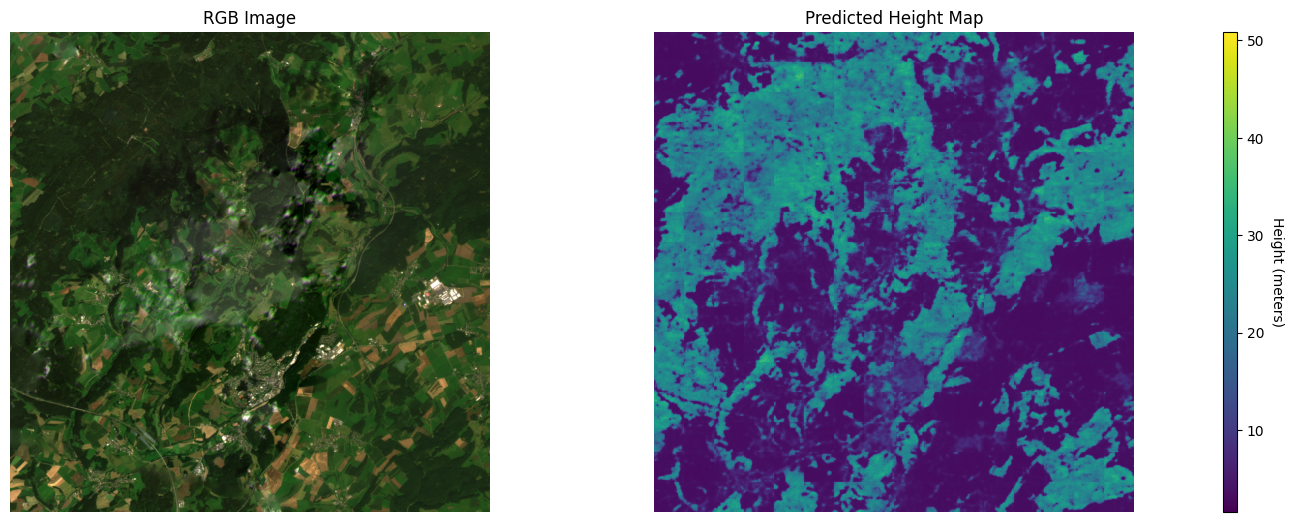

In [10]:
plot_image_and_prediction(
    *predict_image(model, device, f"{img_dir}/L15-1060E-1355N.tif", image_size)
)

# Evaulate model

Testing:   0%|          | 0/8 [00:00<?, ?it/s]loc("mps_not_equal"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":253:0)): error: 'anec.not_equal_zero' op Invalid configuration for the following reasons: Tensor dimensions N1D1C1H1W1572864 are not within supported range, N[1-65536]D[1-16384]C[1-65536]H[1-16384]W[1-16384].
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.not_equal_zero' op Invalid configuration for the following reasons: Tensor dimensions N1D1C1H1W1572864 are not within supported range, N[1-65536]D[1-16384]C[1-65536]H[1-16384]W[1-16384].
Testing:  88%|████████▊ | 7/8 [00:16<00:01,  1.67s/it

Final test loss: 1.303978
Final MAE loss: 2.192806
Final RMSE loss: 3.802995
Ranges: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
Losses by range: [0.655977   1.4850153  2.492095   2.275554   1.5506209  1.7884405
 4.1922064  5.33425    1.4124397  0.40022326]


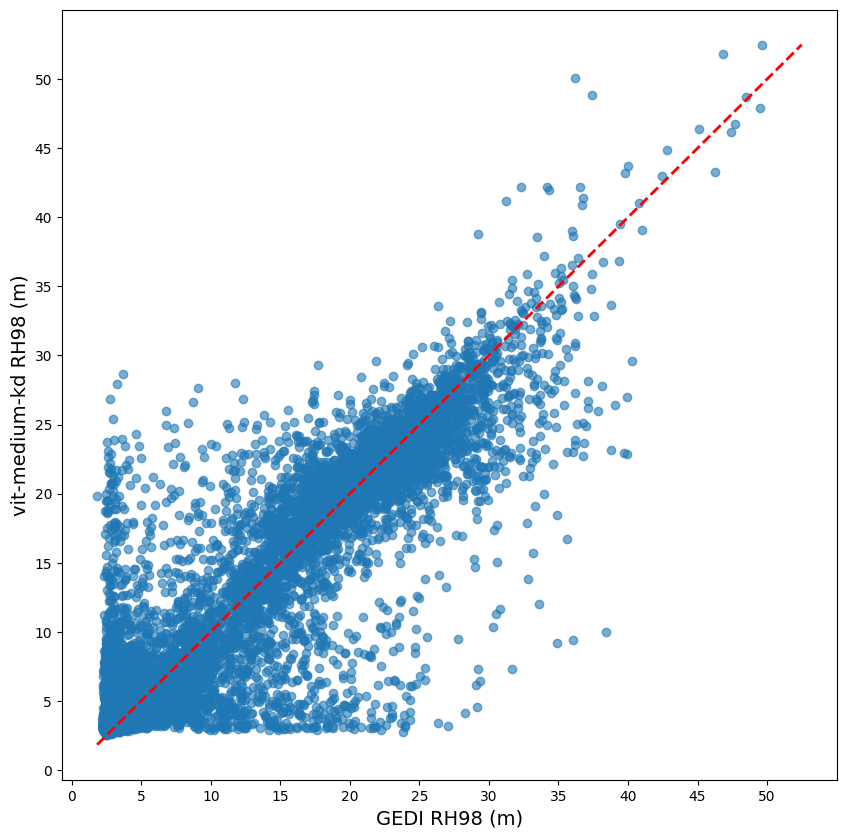

In [11]:
(
    test_loss,
    test_mae,
    test_rmse,
    test_loss_by_range,
    labels,
    predicted,
) = test(model, test_dl, loss, device, bins)

print(
    f"Final test loss: {test_loss:>8f}\n"
    f"Final MAE loss: {test_mae:>8f}\n"
    f"Final RMSE loss: {test_rmse:>8f}\n"
    f"Ranges: {bins}\n"
    f"Losses by range: {test_loss_by_range}"
)

plot_true_vs_predicted_scatter(labels, predicted, model_name)

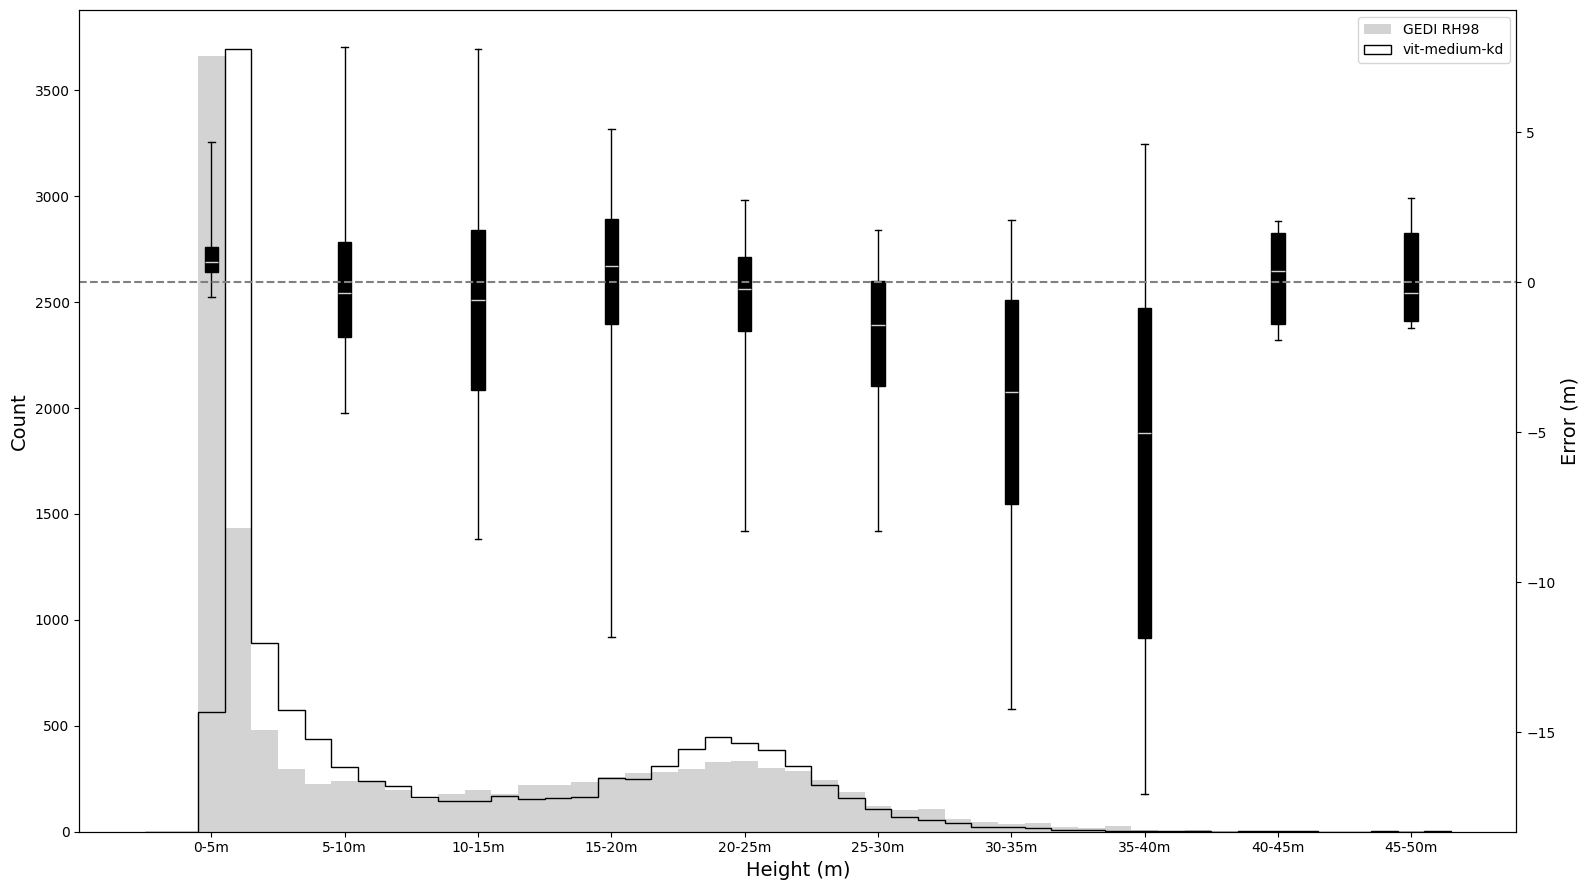

In [12]:
plot_true_vs_predicted_histogram(labels, predicted, model_name)